# Symmetry Diagrams

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import cmasher as cmr
import scipy.special as spe
from matplotlib.pyplot import figure
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import scipy.integrate as integrate

In [2]:
def paperFigureSettings():
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['stixsans']
    mpl.rcParams['font.size'] = 7
    mpl.rcParams['text.latex.preamble'] = r'\usepackage[eulergreek]{sansmath}\sansmath\usepackage{amsmath}'
    

## Molecular Symmetry Diagram

In [28]:
def get_l0_lam0_State(X,Y,x0):
    rv = np.sqrt((X-x0)**2+Y**2)
    thetav = np.arctan2(Y,(X-x0))
    return rv*np.exp(-rv/2)*np.sin(thetav)

def get_l0_lam1_State(X,Y,x0):
    rv = np.sqrt((X-x0)**2+Y**2)
    thetav = np.arctan2(Y,(X-x0))
    return rv*np.exp(-rv/2)*np.cos(thetav)

def plot_diagram(lmda_a = 0,lmda_b = 0,sign_a = 1,sign_b = 1,exchange=False, invert=False,figsize=10,atomLoc=10):
    mpl.rcParams['figure.dpi']=600
    ratio = 1
    sz = 20
    Llength = 6
    fig1, ax1 = plt.subplots(figsize=(ratio*figsize,figsize))
    phi_range, theta_range = np.linspace(0, np.pi, 100), np.linspace(0, 2*np.pi, 100)
    phi, theta = np.meshgrid(phi_range, theta_range)
    x = y = np.linspace(-sz, sz, 500)
    X, Y = np.meshgrid(x,y)
    if exchange==True:
        atomLoc = atomLoc*(-1)
    if invert==True:
        sign_a = (-1)*sign_b
        sign_b = (-1)*sign_a        
    if lmda_a==1 and lmda_b==1:
        Z = (-1)*get_l0_lam1_State(X,Y,-atomLoc) + (-1)*get_l0_lam1_State(X,Y,atomLoc)  
    elif lmda_a==1 and lmda_b==-1:
        Z = (-1)*get_l0_lam1_State(X,Y,-atomLoc) + get_l0_lam1_State(X,Y,atomLoc) 
    elif lmda_a==-1 and lmda_b==1:
        Z = get_l0_lam1_State(X,Y,-atomLoc) + (-1)*get_l0_lam1_State(X,Y,atomLoc)
    elif lmda_a==-1 and lmda_b==-1:
        Z = get_l0_lam1_State(X,Y,-atomLoc) + get_l0_lam1_State(X,Y,atomLoc) 
    elif lmda_a==-1 and lmda_b==0:
        Z = get_l0_lam1_State(X,Y,-atomLoc) + get_l0_lam0_State(X,Y,atomLoc) 
    elif lmda_a==1 and lmda_b==0:
        Z = (-1)*get_l0_lam1_State(X,Y,-atomLoc) + sign_b*get_l0_lam0_State(X,Y,atomLoc) 
    elif lmda_a==0 and lmda_b==1:
        Z = sign_a*get_l0_lam0_State(X,Y,-atomLoc) + (-1)*get_l0_lam1_State(X,Y,atomLoc) 
    else:
        Z = sign_a*get_l0_lam0_State(X,Y,-atomLoc) + sign_b*get_l0_lam0_State(X,Y,atomLoc)
        
    ax1.pcolormesh(X,Y,Z, cmap=cmr.fusion)
    ax1.axhline(0,ls='--', lw=1, color='k')
    ax1.axvline(0,ls='--', lw=1, color='k')
    ax1.plot( [0], [0], 'ok',ms=2) # inversion point
    # ax1.annotate('Inversion Point', xy=(0,0), xytext=(0, sz/ratio-10), 
    #         arrowprops=dict(arrowstyle='-|>',color='k', lw=1, shrinkA=0,shrinkB=5), ha='center' )

    # ax1.text(-atomLoc-2,6,r'$\ell_{a}=1, \lambda_{a}=$'+str(lmda_a)) # R
    # ax1.text(atomLoc-2,6,r'$\ell_{b}=1, \lambda_{b}=$'+str(lmda_b)) # R
    ax1.plot([-atomLoc,atomLoc],[0,0],ls='',marker='o',color='g',ms=10, zorder=5) # nuclei
    ax1.axis('off')
    ax1.set_ylim(-sz/ratio,sz/ratio)
    return fig1


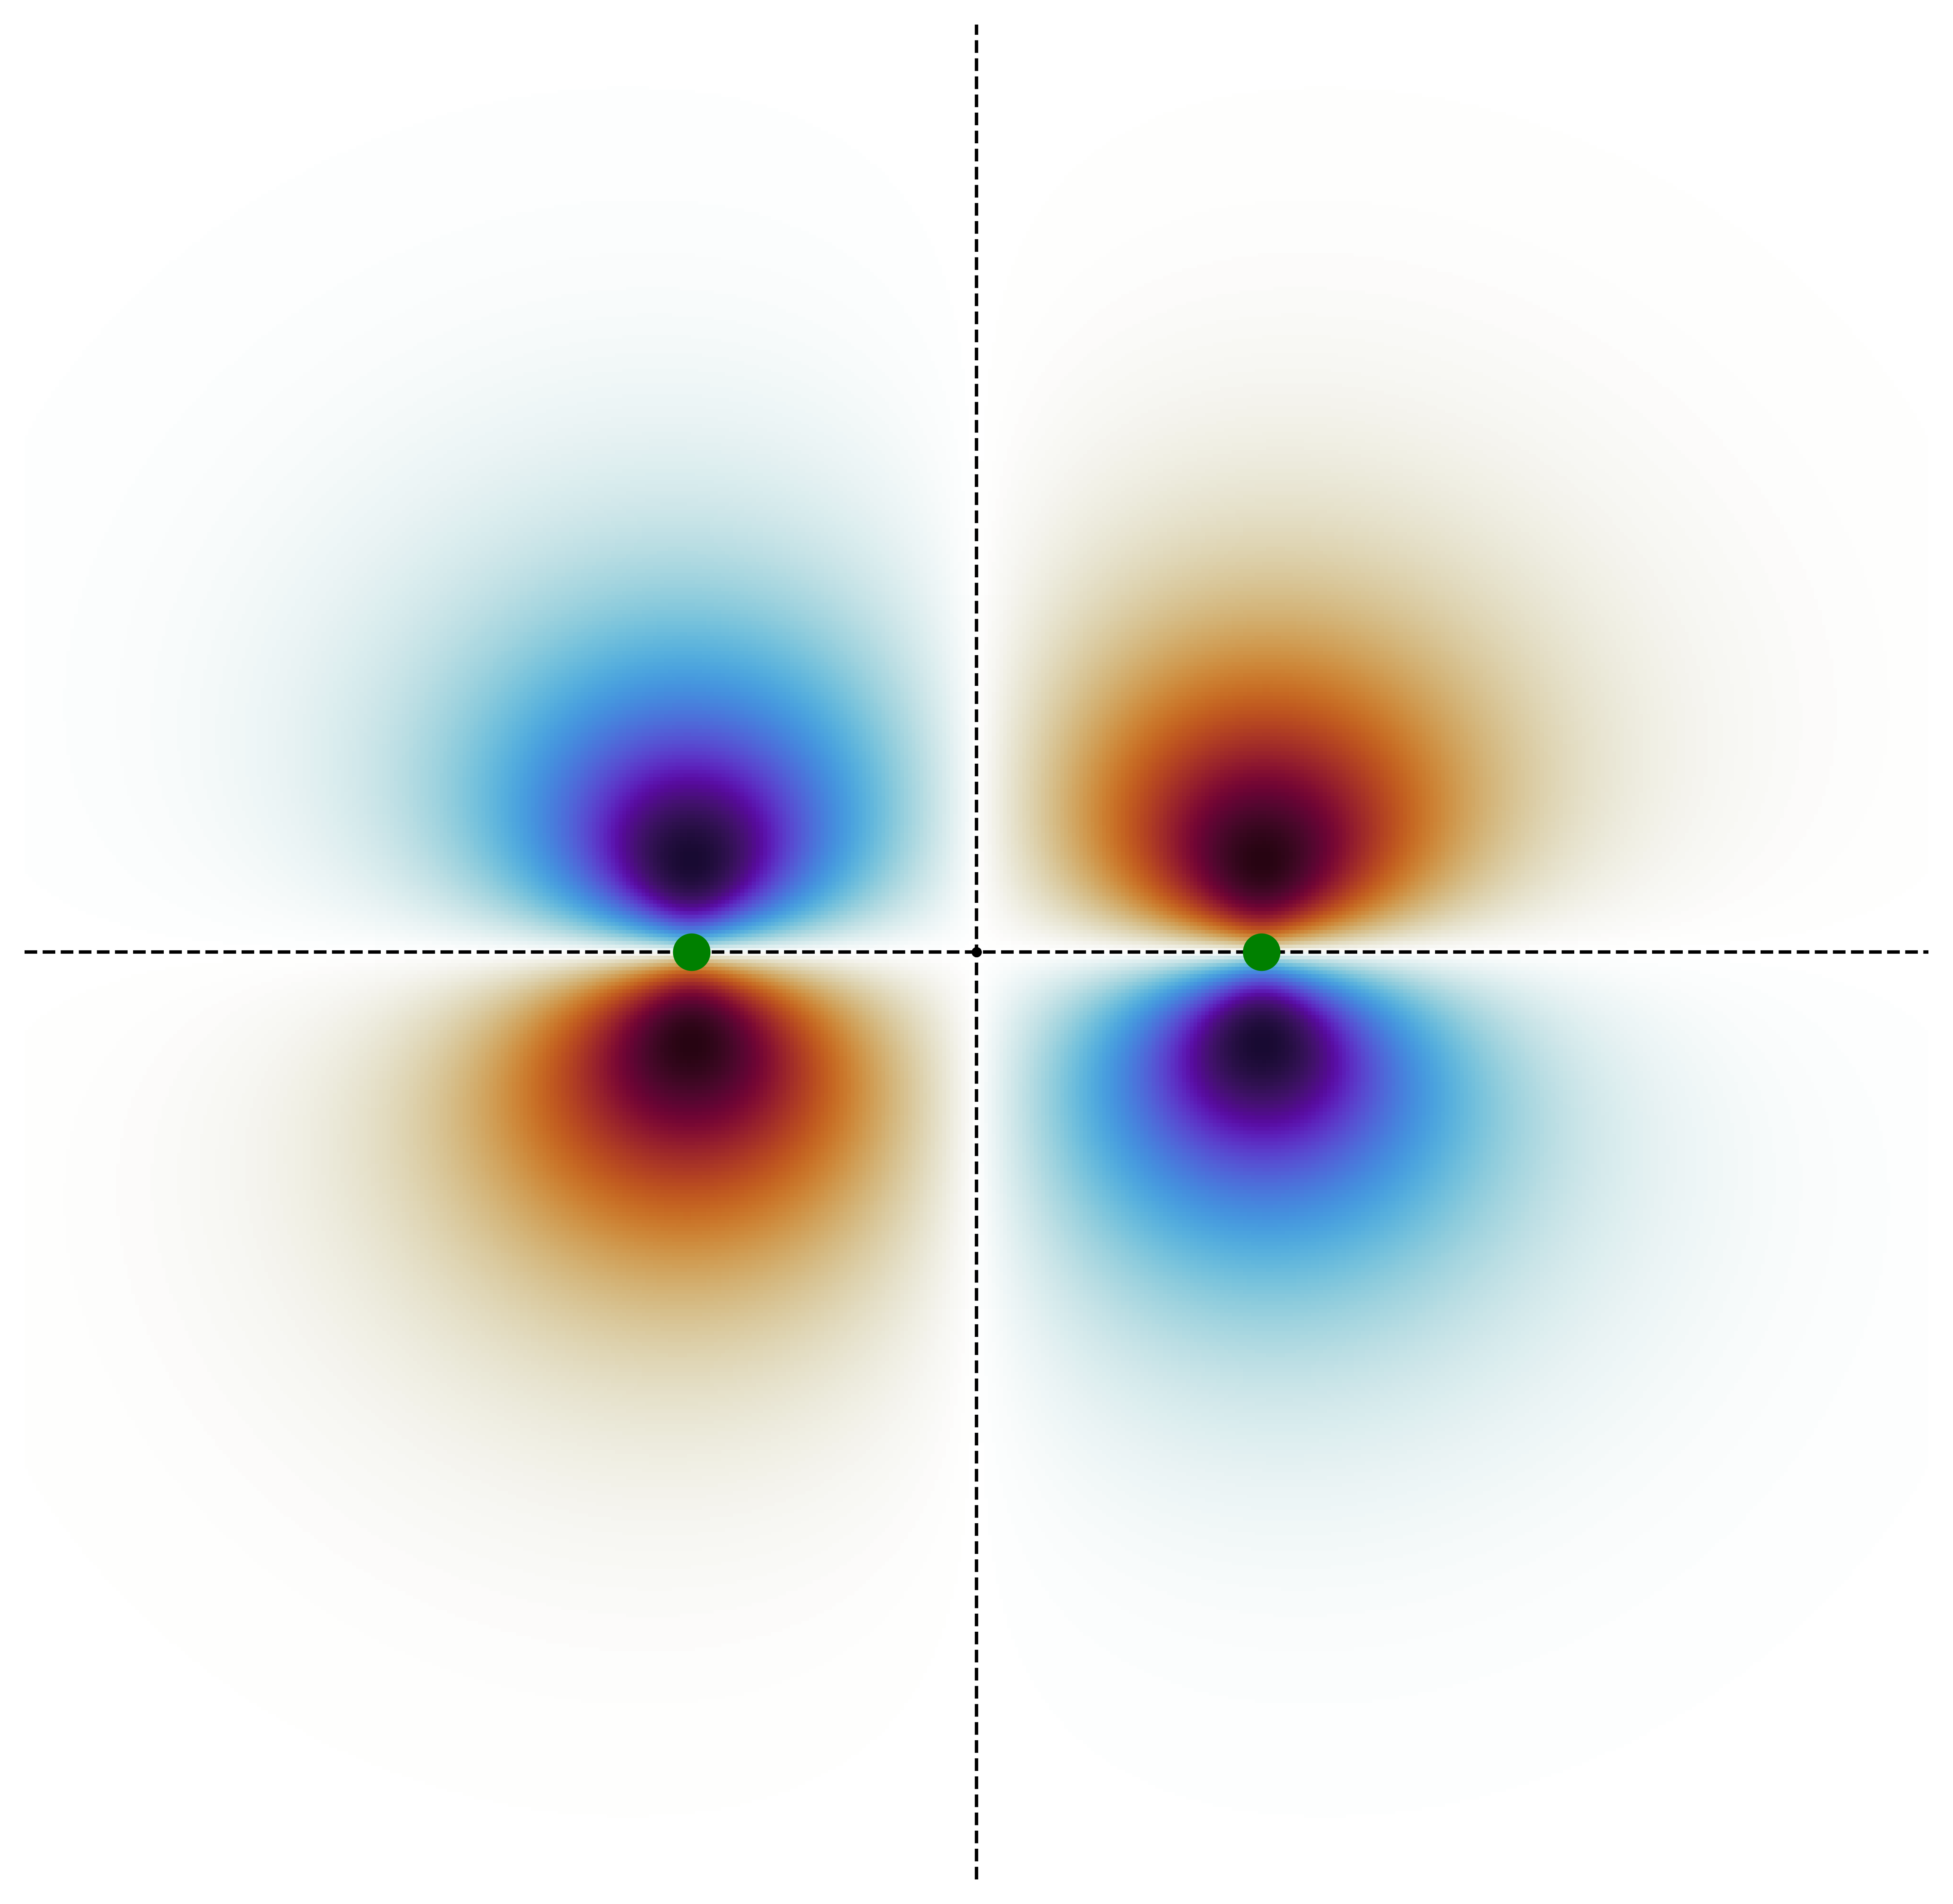

In [31]:
a = plot_diagram(lmda_a = 0,lmda_b = 0,sign_a = 1,sign_b = -1,exchange=False, invert=False, atomLoc=6)
plt.savefig('symm_inv_g.png', dpi=600,bbox_inches="tight")

## Radial wavefunction 

## Spherical harmonics

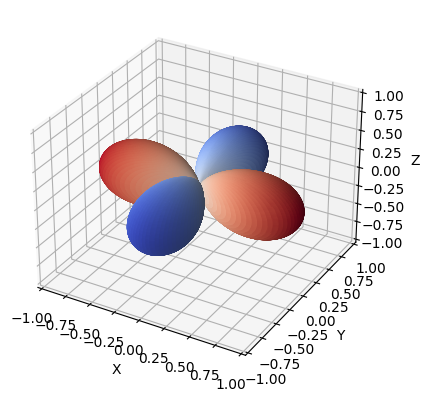

In [130]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm

 
# resolution - increase this to get a smoother plot 
#  at the cost of slower processing
N = 200
 
# Create matrices of polar, azimuthal angle points to plot
theta = np.linspace(0, np.pi, N)
phi = np.linspace(0, 2*np.pi, N)
theta, phi = np.meshgrid(theta, phi)
 
# Calculate the spherical harmonic Y(l,m)
# https://en.wikipedia.org/wiki/Table_of_spherical_harmonics
# uncomment one of the lines below to plot that example
# Y(0, 0)
# Yvals = 0.5 * np.sqrt(1 / np.pi) * np.ones(theta.shape)
# Y(1, 1)
# Yvals = -0.5 * np.sqrt(1.5 / np.pi) * np.cos(phi) * np.sin(theta)
# Y(2, 2)
Yvals = 0.25 * np.sqrt(7.5 / np.pi) * np.cos(2 * phi) * np.sin(theta)**2
 
# Make some adjustments for nice plots
Ymax, Ymin = Yvals.max(), Yvals.min()
if (Ymax != Ymin):
# normalize the values to [1, -1]
    Yvals = 2 * (Yvals - Ymin)/(Ymax - Ymin) - 1
# Use the absolute value of Y(l,m) as the radius
    radii = np.abs(Yvals)
# put the colors in the range [1, 0]
    Ycolors = 0.5 * (Yvals + 1)
else:
# can't normalize b/c Y(0,0) is single-valued
    radii = np.ones(Yvals.shape)
    Ycolors = np.ones(Yvals.shape)
 
# Compute Cartesian coordinates of the surface
x = radii * np.sin(theta) * np.cos(phi)
y = radii * np.sin(theta) * np.sin(phi)
z = radii * np.cos(theta)
 
# Do the actual plotting
# negative values will be blue, positive red
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.coolwarm(Ycolors))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

In [2]:
def psi_ang(phi,theta,l=0,m=0):
    sphHarm = spe.sph_harm(m,l,phi,theta)
    return sphHarm.real

(-1.0, 1.0)

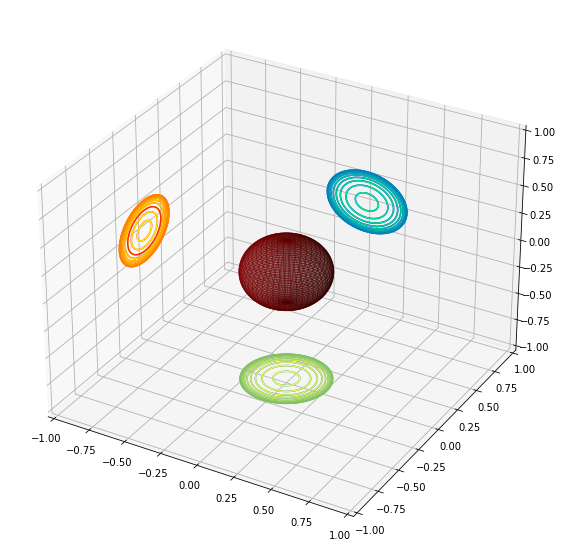

In [3]:
phi_range, theta_range = np.linspace(0, np.pi, 100), np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi_range, theta_range)

Ylm_1 = psi_ang(theta,phi,l=0,m=0)

x_1 = np.sin(phi) * np.cos(theta) * abs(Ylm_1)
y_1 = np.sin(phi) * np.sin(theta) * abs(Ylm_1)
z_1 = np.cos(phi) * abs(Ylm_1)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
if Ylm_1.max() == Ylm_1.min():
    fcolors = np.ones(Ylm_1.shape)
else:
    fcolors = (Ylm_1 - Ylm_1.min())/(Ylm_1.max() - Ylm_1.min())
ax.plot_surface(x_1, y_1, z_1, facecolors=cm.seismic(fcolors), alpha=0.3)
cset = ax.contour(x_1, y_1, z_1,20, zdir='z',offset = -1, cmap='summer')
cset = ax.contour(x_1, y_1, z_1,20, zdir='y',offset =  1, cmap='winter' )
cset = ax.contour(x_1, y_1, z_1,20, zdir='x',offset = -1, cmap='autumn')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)


(-1.0, 1.0)

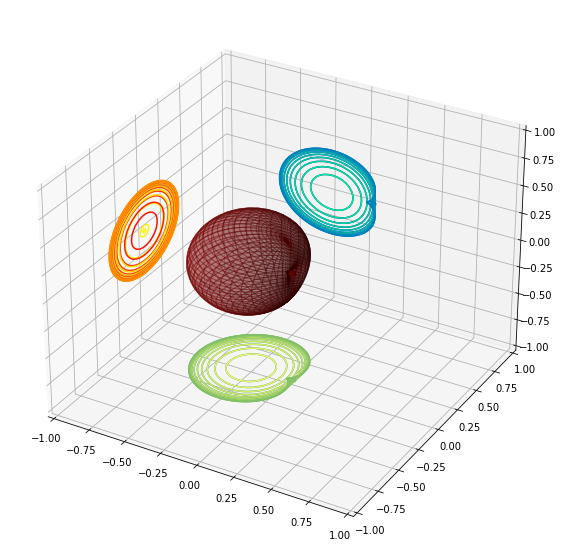

In [3]:
phi_range, theta_range = np.linspace(0, np.pi, 100), np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi_range, theta_range)

Ylm_1 = psi_ang(theta,phi,l=0,m=0)
Ylm_2 = psi_ang(theta,phi,l=1,m=1)
# Ylm_2=0

x_1 = np.sin(phi) * np.cos(theta) * abs(Ylm_1+Ylm_2)
y_1 = np.sin(phi) * np.sin(theta) * abs(Ylm_1+Ylm_2)
z_1 = np.cos(phi) * abs(Ylm_1+Ylm_2)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
if Ylm_1.max() == Ylm_1.min():
    fcolors = np.ones((Ylm_1+Ylm_2).shape)
else:
    fcolors = ((Ylm_1+Ylm_2) - (Ylm_1+Ylm_2).min())/((Ylm_1+Ylm_2).max() - (Ylm_1+Ylm_2).min())
ax.plot_surface(x_1, y_1, z_1, facecolors=cm.seismic(fcolors), alpha=0.3)
cset = ax.contour(x_1, y_1, z_1,20, zdir='z',offset = -1, cmap='summer')
cset = ax.contour(x_1, y_1, z_1,20, zdir='y',offset =  1, cmap='winter' )
cset = ax.contour(x_1, y_1, z_1,20, zdir='x',offset = -1, cmap='autumn')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)


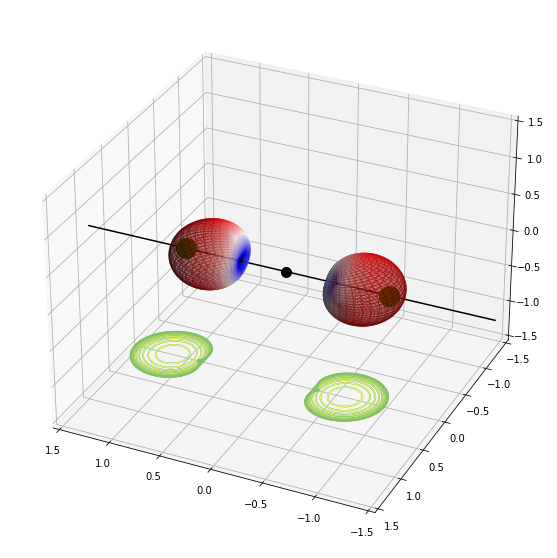

In [13]:
def photo_assoc_sym(Y_1a,Y_1b,Y_2a,Y_2b,angle):
    phi_range, theta_range = np.linspace(0, np.pi, 100), np.linspace(0, 2*np.pi, 100)
    phi, theta = np.meshgrid(phi_range, theta_range)
    l_1a,m_1a,l_1b,m_1b = Y_1a[0],Y_1a[1],Y_1b[0],Y_1b[1]
    l_2a,m_2a,l_2b,m_2b  = Y_2a[0],Y_2a[1],Y_2b[0],Y_2b[1]
    
    Ylm_1_a = psi_ang(theta,phi,l_1a,m_1a)
    Ylm_1_b = psi_ang(theta,phi,l_1b,m_1b)
    Ylm_2_a = psi_ang(theta,phi,l_2a,m_2a)
    Ylm_2_b = psi_ang(theta,phi,l_2b,m_2b)

    x_1 = np.sin(phi)* np.cos(theta)  * abs(Ylm_1_a+Ylm_1_b)
    y_1 = np.sin(phi) * np.sin(theta) * abs(Ylm_1_a+Ylm_1_b)
    z_1 = np.cos(phi) * abs(Ylm_1_a+Ylm_1_b)

    x_2 = np.sin(phi) * np.cos(theta) * abs(Ylm_2_a+Ylm_2_b)
    y_2 = np.sin(phi) * np.sin(theta) * abs(Ylm_2_a+Ylm_2_b)
    z_2 = np.cos(phi) * abs(Ylm_2_a+Ylm_2_b)

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    fcolors_1 = ((Ylm_1_a+Ylm_1_b) - (Ylm_1_a+Ylm_1_b).min())/((Ylm_1_a+Ylm_1_b).max() - (Ylm_1_a+Ylm_1_b).min())
    ax.plot_surface(x_1-.5, y_1, z_1, facecolors=cm.seismic(fcolors_1), alpha=0.3)
    cset = ax.contour(x_1-.6, y_1+.6, z_1,20, zdir='z',offset = -1, cmap='summer')
    # cset = ax.contour(x_1-1, y_1, z_1,20, zdir='y',offset =  1, cmap='winter' )
    # cset = ax.contour(x_1-2, y_1-.05, z_1,20, zdir='x',offset = -1, cmap='autumn')

    fcolors_2 = ((Ylm_2_a+Ylm_2_b) - (Ylm_2_a+Ylm_2_b).min())/((Ylm_2_a+Ylm_2_b).max() - (Ylm_2_a+Ylm_2_b).min())
    ax.plot_surface(x_2+.5, y_2, z_2, facecolors=cm.seismic(fcolors_2), alpha=0.3)
    cset = ax.contour(x_2+.6, y_2+.6, z_2,20, zdir='z',offset = -1, cmap='summer')
    # cset = ax.contour(x_2, y_2, z_2,20, zdir='y',offset =  1, cmap='winter' )
    # cset = ax.contour(x_2+2, y_2-.05, z_2,20, zdir='x',offset = 1, cmap='autumn')

    # line 
    x = np.linspace(-2.0, 2.0, 100)
    y = np.linspace(0,0,100)
    z = np.linspace(0,0,100)
    ax.plot(x,y,z,'k')
    ax.plot([0], [0], [0], 'ok',ms=10) # center of inversion
    ax.plot([1], [0], [0], 'og',ms=20)
    ax.plot([-1], [0], [0], 'og',ms=20)
    # X, Z = np.meshgrid([-dim, dim], [-dim, dim])
    # Y = np.zeros((2, 2))
    # ax.plot_surface(X, Y, Z, color='green', alpha=.5, linewidth=0, zorder=1)
    ang_x,ang_y = angle[0],angle[1]
    ax.view_init(ang_x,ang_y)
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    ax.set_zlim(-1.5,1.5)
    # inversion_op = -(Ylm_1_a+Ylm_1_b)
    # inversion_sym==True if 
    # return 
    
photo_assoc_sym((0,0),(1,1),(0,0),(1,-1),(30, 115))

In [19]:
def psi_R(r,n=1,l=0):

    coeff = np.sqrt((2.0/n)**3 * spe.factorial(n-l-1) /(2.0*n*spe.factorial(n+l)))
    laguerre = spe.assoc_laguerre(2.0*r/n,n-l-1,2*l+1)
    return coeff * np.exp(-r/n) * (2.0*r/n)**l * laguerre

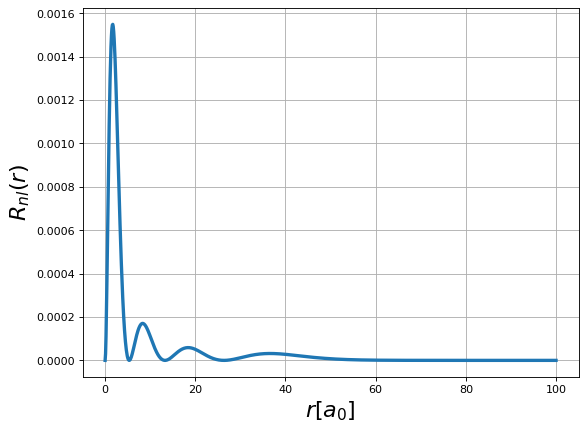

In [172]:
figure(figsize=(8, 6), dpi=80)
r = np.linspace(0,100,1000)
R = psi_R(r,n=5,l=1)
plt.plot(r, R**2, lw=3)
plt.xlabel('$r [a_0]$',fontsize=20)
plt.ylabel('$R_{nl}(r)$', fontsize=20)
plt.grid('True')

In [17]:
def HFunc(r,theta,phi,n,l,m):
    return psi_R(r,n,l) * psi_ang(phi,theta,l,m)

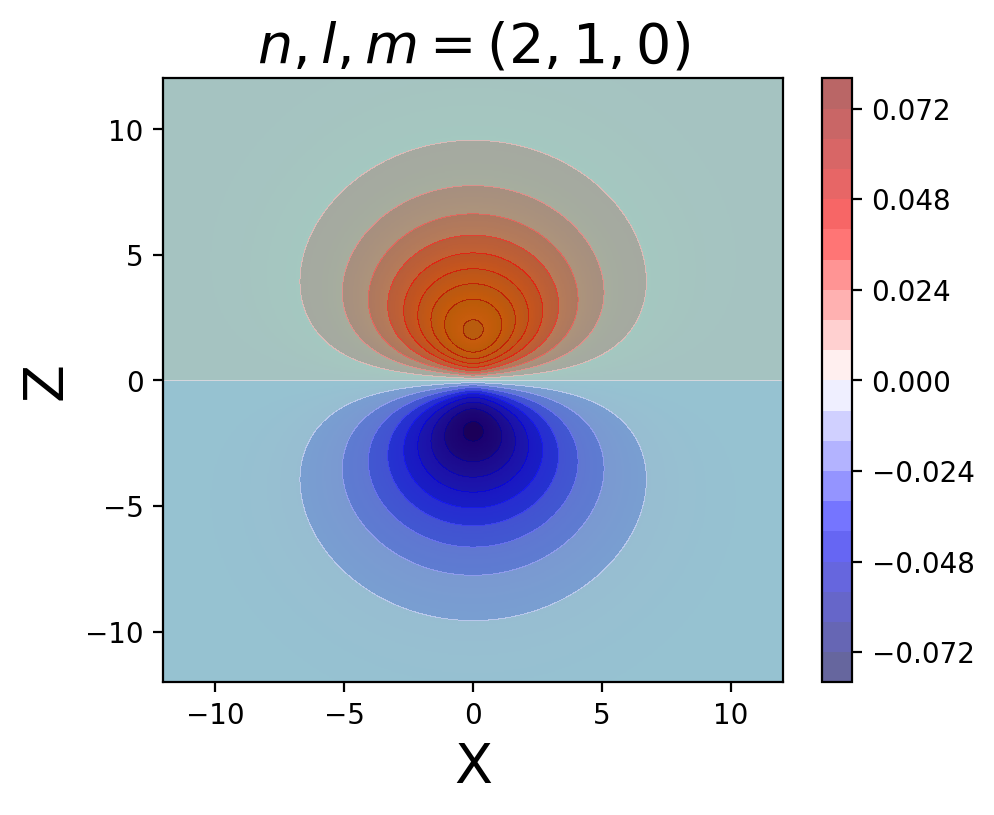

In [19]:
nmax = 10
lmax = nmax-1

def psi_xz_plot(n=1,l=0,m=0):
    mpl.rcParams['figure.dpi']=200
    plt.figure(figsize=(5,4))
    limit = 4*(n+l) 
    x_1d = np.linspace(-limit,limit,500)
    z_1d = np.linspace(-limit,limit,500)
    x,z = np.meshgrid(x_1d,z_1d)
    y   = 0
    r     = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arctan2(np.sqrt(x**2+y**2), z )
    phi   = np.arctan2(y, x)
    psi_nlm = HFunc(r,theta,phi,n,l,m)
    plt.pcolormesh(x, z, psi_nlm, cmap='viridis')  # Try cmap = inferno, rainbow, autumn, summer, 
    plt.contourf(x, z,  psi_nlm, 20, cmap='seismic', alpha=0.6)  # Classic orbitals
    plt.colorbar()
    fontsize = 20
    plt.title(f"$n,l,m={n,l,m}$",fontsize=fontsize)
    plt.xlabel('X',fontsize=fontsize)
    plt.ylabel('Z',fontsize=fontsize)
a = psi_xz_plot(n=2,l=1,m=0)

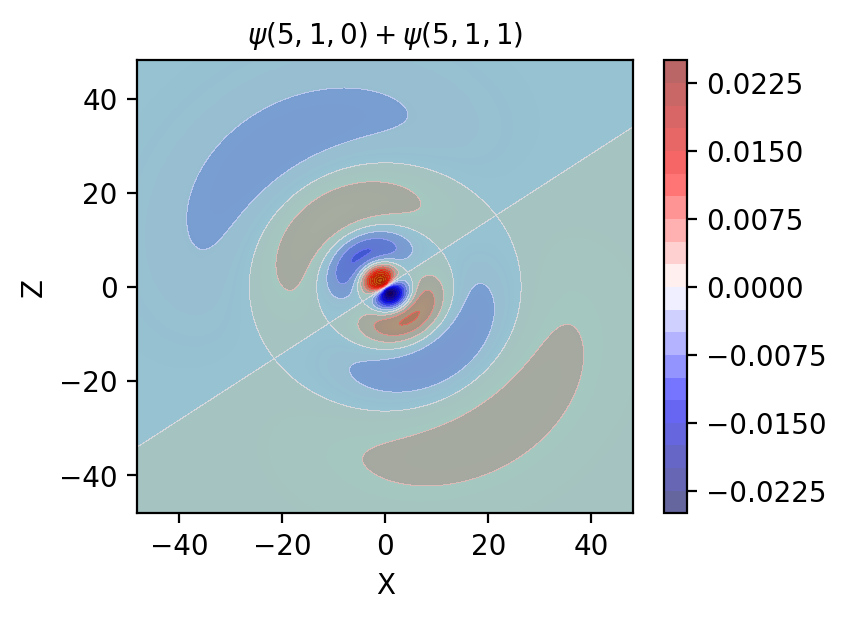

In [23]:
nmax = 10
lmax = nmax-1

def psi_xz_plot_sup(n_1=1,l_1=0,m_1=0,n_2=5,l_2=4,m_2=1):
    mpl.rcParams['figure.dpi']=200
    plt.figure(figsize=(4,3))
    limit = 4*((n_1+n_2)+(l_1+l_2))
    # limit = 1000
    x_1d = np.linspace(-limit,limit,500)
    z_1d = np.linspace(-limit,limit,500)
    x,z = np.meshgrid(x_1d,z_1d)
    y   = 0
    r     = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arctan2(np.sqrt(x**2+y**2), z )
    phi   = np.arctan2(y, x)
    psi_nlm_1 = HFunc(r,theta,phi,n_1,l_1,m_1)
    psi_nlm_2 = HFunc(r,theta,phi,n_2,l_2,m_2)
    plt.pcolormesh(x, z, psi_nlm_1+psi_nlm_2, cmap='viridis')  # Try cmap = inferno, rainbow, autumn, summer, 
    plt.contourf(x, z,  psi_nlm_1+psi_nlm_2, 20, cmap='seismic', alpha=0.6)  # Classic orbitals
    plt.pcolormesh(x, z, psi_nlm_1+psi_nlm_2, cmap='viridis')  # Try cmap = inferno, rainbow, autumn, summer, 
    plt.contourf(x, z,  psi_nlm_1+psi_nlm_2, 20, cmap='seismic', alpha=0.6)  # Classic orbitals
    plt.colorbar()
    fontsize = 10
    plt.title(f"$\psi{n_1,l_1,m_1}+\psi{n_2,l_2,m_2}$",fontsize=fontsize)
    plt.xlabel('X',fontsize=fontsize)
    plt.ylabel('Z',fontsize=fontsize)
a = psi_xz_plot_sup(n_1=5,l_1=1,m_1=0,n_2=5,l_2=1,m_2=1)